#**Exercícios - Aula 1**

## 1) Dado o dataset de produtos [1]:

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv",
    delimiter=";",
    encoding='utf-8' )

#### 1.1. Analise o % de valores nulos no dataset

In [8]:
# resposta

df.isna().sum()/len(df)

nome         0.000000
descricao    0.285294
categoria    0.000000
dtype: float64

#### 1.2. Remova os registros/linhas com valores nulos, se houver

In [9]:
# resposta

dft = df.dropna()
dft.head()

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


#### 1.3. Analise a distribuição das “categorias”

<Axes: xlabel='categoria', ylabel='count'>

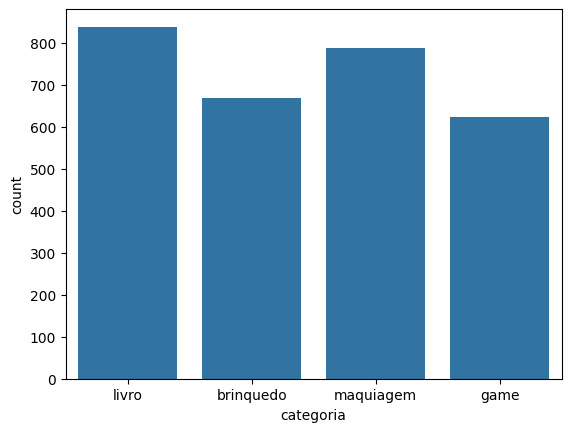

In [10]:
# resposta

import seaborn as sns

sns.countplot(x="categoria", data=dft)

#### 1.4 Crie uma nova coluna chamada "texto“, concatenando as colunas "nome" e "descricao"


In [11]:
# resposta

dft['texto'] = dft['nome'] + " " + dft['descricao']

dft.head()

C:\Users\guilherme.luz\AppData\Local\Temp\ipykernel_1516\2713212811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['texto'] = dft['nome'] + " " + dft['descricao']


,nome,descricao,categoria,texto
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bol...
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,Livro - It A Coisa - Stephen King Produto No...
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,Box As Crônicas De Gelo E Fogo Pocket 5 Li...
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,Box Harry Potter Produto Novo e Físico A sé...
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,Livro Origem - Dan Brown Produto NovoDe Onde...


#### 1.5 Descubra as 10 palavras que mais ocorrem nessa nova coluna “texto”

In [12]:
# exemplo de referência para montar a lógica
from collections import Counter
counter = Counter()
counter['a'] += 1
counter
counter.most_common()

counter.update('a')
counter.update('b')

In [24]:
from collections import Counter

# Create an empty Counter object
word_counts = Counter()

# Split the text into words, convert to lowercase, and update the Counter object
for text in dft['texto']:
    words = text.lower().split()
    word_counts.update(words)

# Print the top 10 most common words
print(word_counts.most_common(10))

[('de', 24300), ('e', 16042), ('o', 12424), ('a', 12152), ('do', 8791), ('para', 8032), ('-', 7413), ('em', 6900), ('que', 6797), ('com', 6247)]


### **Bônus!** Monte uma nuvem de palavras

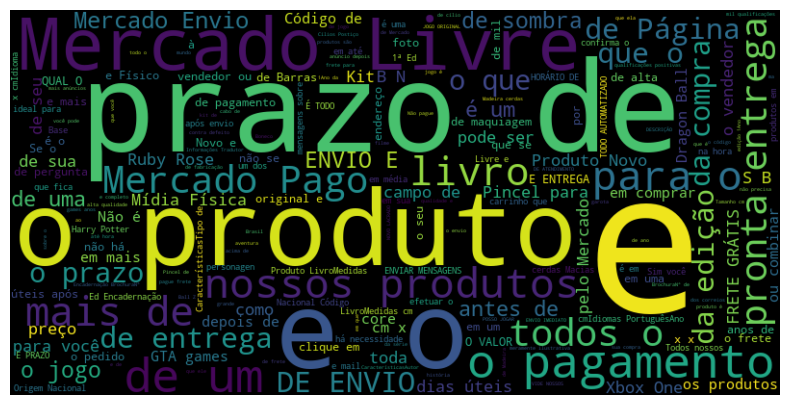

In [13]:
# resposta
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud from the 'texto' column
wordcloud = WordCloud(width=800, height=400).generate(' '.join(dft['texto']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 2) Utilizando o dataset de produtos [1]:

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv",
    delimiter=";",
    encoding='utf-8' )

#### 2.1. Elimine linhas com valores nulos

In [2]:
# resposta

df.dropna(inplace=True)

#### 2.2. Adicione uma nova coluna chamada texto, formada pela composição das colunas nome e descrição

In [5]:
# resposta

df['vector'] = df['nome'] + " " + df['descricao']
df.head()

,nome,descricao,categoria,vector
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bol...
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,Livro - It A Coisa - Stephen King Produto No...
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,Box As Crônicas De Gelo E Fogo Pocket 5 Li...
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,Box Harry Potter Produto Novo e Físico A sé...
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,Livro Origem - Dan Brown Produto NovoDe Onde...


#### 2.3. Conte quantos Unigramas existem antes e depois de remover stopwords (use a coluna texto)

In [19]:
# resposta

import nltk
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

### UNIGRAMAS
vect = CountVectorizer(ngram_range=(1,1), stop_words=None)
vect.fit(df.stemmer)

text_vect = vect.transform(df.stemmer)

print('UNIGRAMAS ANTES DE REMOÇÃO DE STOPWORDS', text_vect.shape[1])

### UNIGRAMAS

vect = CountVectorizer(ngram_range=(1,1), stop_words=stopwords)
vect.fit(df.stemmer)

text_vect = vect.transform(df.stemmer)

print('UNIGRAMAS DEPOIS DE REMOÇÃO STOPWORDS', text_vect.shape[1])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guilherme.luz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


UNIGRAMAS ANTES DE REMOÇÃO DE STOPWORDS 35647
UNIGRAMAS DEPOIS DE REMOÇÃO STOPWORDS 35488


#### 2.4. Conte quantos Bigramas existem antes e depois de remover stopwords (use a coluna texto)

In [21]:
# resposta

import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

### BIGRAMAS
vect = CountVectorizer(ngram_range=(2,2), stop_words=None)
vect.fit(df.vector)

text_vect = vect.transform(df.vector)

print('BIGRAMAS ANTES DE REMOÇÃO DE STOPWORDS', text_vect.shape[1])

### Bigramas

vect = CountVectorizer(ngram_range=(2,2), stop_words=stopwords)
vect.fit(df.vector)

text_vect = vect.transform(df.vector)

print('BIGRAMAS DEPOIS DE REMOÇÃO STOPWORDS', text_vect.shape[1])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guilherme.luz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


BIGRAMAS ANTES DE REMOÇÃO DE STOPWORDS 159553
BIGRAMAS DEPOIS DE REMOÇÃO STOPWORDS 145224


#### 2.5. Conte quantos Trigramas existem antes e depois de remover stopwords (use a coluna texto)

In [22]:
# resposta

# resposta

import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

### TRIGRAMAS
vect = CountVectorizer(ngram_range=(3,3), stop_words=None)
vect.fit(df.vector)

text_vect = vect.transform(df.vector)

print('TRIGRAMAS ANTES DE REMOÇÃO DE STOPWORDS', text_vect.shape[1])

### TRIGRAMAS

vect = CountVectorizer(ngram_range=(3,3), stop_words=stopwords)
vect.fit(df.vector)

text_vect = vect.transform(df.vector)

print('TRIGRAMAS DEPOIS DE REMOÇÃO STOPWORDS', text_vect.shape[1])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guilherme.luz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TRIGRAMAS ANTES DE REMOÇÃO DE STOPWORDS 228162
TRIGRAMAS DEPOIS DE REMOÇÃO STOPWORDS 177377


#### 2.6. Conte quantos unigramas existem na coluna texto após aplicar Stemmer (utilize rslp)

In [23]:
# resposta

import nltk
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.rslp import RSLPStemmer
nltk.download('rslp')

rslp = RSLPStemmer()

df['tokens'] = df.vector.apply(word_tokenize)

def stem_pandas(line):
  return ' '.join([rslp.stem(token) for token in line])

df['stemmer'] = df.tokens.apply(stem_pandas)

vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df.stemmer)

text_vect = vect.transform(df.stemmer)

print('UNIGRAMAS', text_vect.shape[1])

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\guilherme.luz\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


UNIGRAMAS 26532
